In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()  # устанавливаем seaborn по умолчанию для отрисовки графиков

In [3]:
train = pd.read_csv('/content/student_sleep_patterns.csv')

In [4]:
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [5]:
train.describe()

,Student_ID,Age,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
count,500.000000,500.00000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,21.53600,6.472400,5.981600,2.525000,2.462000,62.342000,5.362000,11.166860,12.375860,6.929900,8.988100
std,144.481833,2.33315,1.485764,3.475725,0.859414,1.682325,35.191674,2.967249,5.972352,5.789611,1.183174,1.111253
min,1.000000,18.00000,4.000000,0.100000,1.000000,0.000000,0.000000,1.000000,1.080000,2.050000,5.000000,7.020000
25%,125.750000,20.00000,5.100000,2.900000,1.800000,1.000000,32.750000,3.000000,6.087500,7.297500,5.900000,8.047500
50%,250.500000,21.00000,6.500000,6.050000,2.600000,2.000000,62.500000,5.000000,10.635000,12.690000,6.885000,9.005000
75%,375.250000,24.00000,7.800000,8.800000,3.300000,4.000000,93.250000,8.000000,16.152500,17.327500,7.972500,9.925000
max,500.000000,25.00000,9.000000,12.000000,4.000000,5.000000,120.000000,10.000000,21.930000,22.000000,8.980000,10.990000


In [6]:
train.describe(include=['O'])

,Gender,University_Year
count,500,500
unique,3,4
top,Male,3rd Year
freq,186,132


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Student_ID           500 non-null    int64  
 1   Age                  500 non-null    int64  
 2   Gender               500 non-null    object 
 3   University_Year      500 non-null    object 
 4   Sleep_Duration       500 non-null    float64
 5   Study_Hours          500 non-null    float64
 6   Screen_Time          500 non-null    float64
 7   Caffeine_Intake      500 non-null    int64  
 8   Physical_Activity    500 non-null    int64  
 9   Sleep_Quality        500 non-null    int64  
 10  Weekday_Sleep_Start  500 non-null    float64
 11  Weekend_Sleep_Start  500 non-null    float64
 12  Weekday_Sleep_End    500 non-null    float64
 13  Weekend_Sleep_End    500 non-null    float64
dtypes: float64(7), int64(5), object(2)
memory usage: 54.8+ KB


In [8]:
train.isnull().sum()

,0
Student_ID,0
Age,0
Gender,0
University_Year,0
Sleep_Duration,0
Study_Hours,0
Screen_Time,0
Caffeine_Intake,0
Physical_Activity,0
Sleep_Quality,0


In [9]:
train['Sleep_Quality_Category'] = pd.cut(train['Sleep_Quality'], bins=[0, 3, 7, 10], labels=['Low', 'Medium', 'High'])

In [10]:
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
train[['Gender', 'University_Year']] = enc.fit_transform(train[['Gender', 'University_Year']])
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Sleep_Quality_Category
0,1,24,2.0,1.0,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06,High
1,2,21,1.0,0.0,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21,Low
2,3,22,1.0,3.0,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92,Medium
3,4,24,2.0,3.0,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42,High
4,5,20,1.0,3.0,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01,Low


In [11]:
from sklearn.preprocessing import MinMaxScaler  # StandardScaler

scaler_mm = MinMaxScaler()

train[['Physical_Activity']] = scaler_mm.fit_transform(train[['Physical_Activity']])
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End,Sleep_Quality_Category
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,10,14.16,4.05,7.41,7.06,High
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,2,8.73,7.10,8.21,10.21,Low
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,5,20.00,20.47,6.88,10.92,Medium
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,9,19.82,4.08,6.69,9.42,High
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,3,20.98,6.12,8.98,9.01,Low


In [12]:
# Функция для извлечения времени в минутах из формата float (часы.минуты)
def time_to_minutes(time):
    hours = int(time)  # Целая часть — это часы
    minutes = (time - hours) * 60  # Дробная часть — это минуты
    return hours * 60 + minutes  # Возвращаем количество минут

# Функция для вычисления продолжительности сна с учетом перехода через полночь
def calculate_sleep_duration(start_time, end_time):
    start_minutes = time_to_minutes(start_time)
    end_minutes = time_to_minutes(end_time)

    # Если время окончания сна меньше времени начала, значит, время окончания на следующий день
    if end_minutes < start_minutes:
        end_minutes += 24 * 60  # Добавляем 24 часа (1440 минут)

    return end_minutes - start_minutes

# Применяем функцию для вычисления продолжительности сна на буднях и выходных
train['Weekday_Sleep_Duration'] = train.apply(
    lambda row: calculate_sleep_duration(row['Weekday_Sleep_Start'], row['Weekday_Sleep_End']), axis=1
)

train['Weekend_Sleep_Duration'] = train.apply(
    lambda row: calculate_sleep_duration(row['Weekend_Sleep_Start'], row['Weekend_Sleep_End']), axis=1
)

# Преобразуем продолжительность сна в часы
train['Weekday_Sleep_Duration'] = train['Weekday_Sleep_Duration'] / 60
train['Weekend_Sleep_Duration'] = train['Weekend_Sleep_Duration'] / 60

train = train.drop(columns=['Weekday_Sleep_Start', 'Weekend_Sleep_Start', 'Weekday_Sleep_End', 'Weekend_Sleep_End'])

train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Sleep_Quality_Category,Weekday_Sleep_Duration,Weekend_Sleep_Duration
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,10,High,17.25,3.01
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,2,Low,23.48,3.11
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,5,Medium,10.88,14.45
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,9,High,10.87,5.34
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,3,Low,12.00,2.89


In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Student_ID              500 non-null    int64   
 1   Age                     500 non-null    int64   
 2   Gender                  500 non-null    float64 
 3   University_Year         500 non-null    float64 
 4   Sleep_Duration          500 non-null    float64 
 5   Study_Hours             500 non-null    float64 
 6   Screen_Time             500 non-null    float64 
 7   Caffeine_Intake         500 non-null    int64   
 8   Physical_Activity       500 non-null    float64 
 9   Sleep_Quality           500 non-null    int64   
 10  Sleep_Quality_Category  500 non-null    category
 11  Weekday_Sleep_Duration  500 non-null    float64 
 12  Weekend_Sleep_Duration  500 non-null    float64 
dtypes: category(1), float64(8), int64(4)
memory usage: 47.6 KB


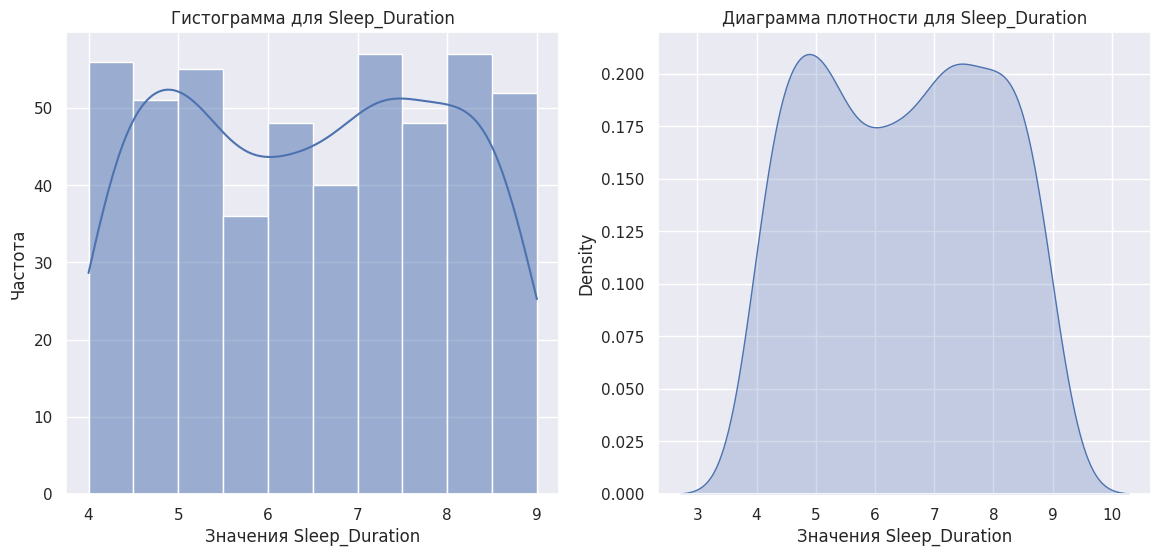

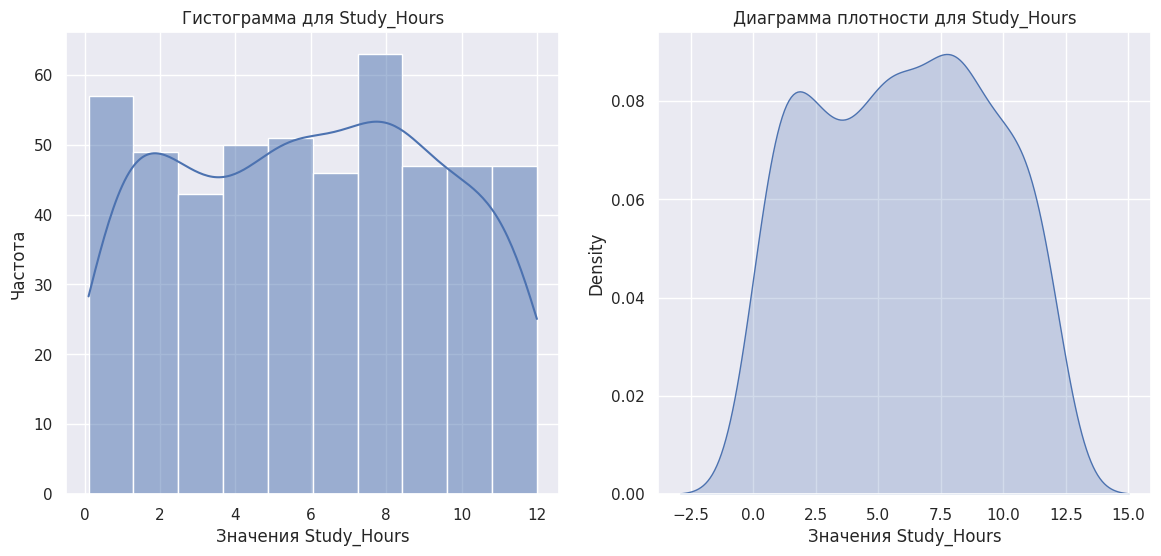

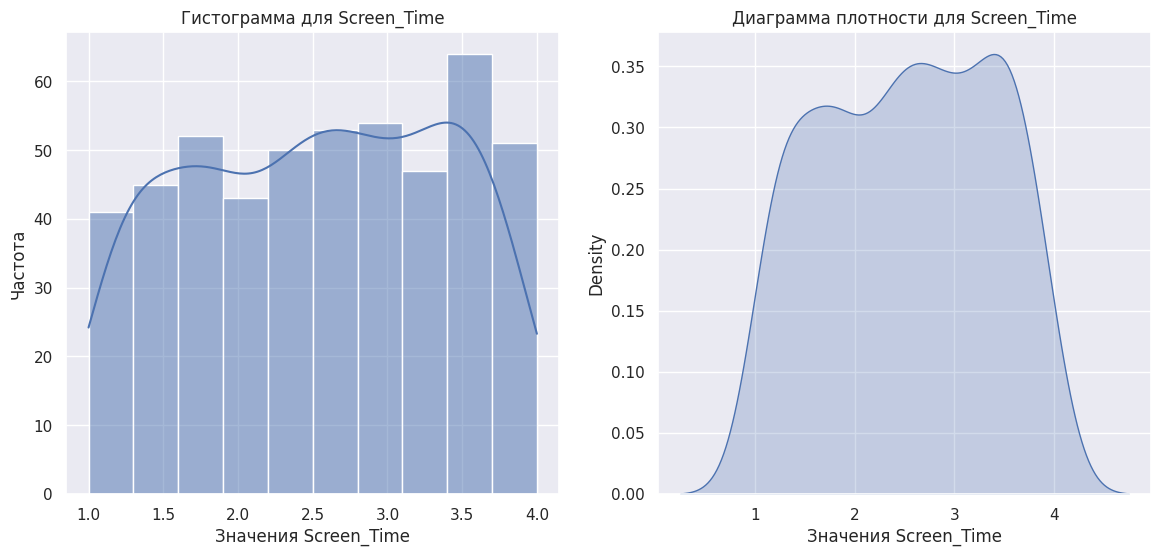

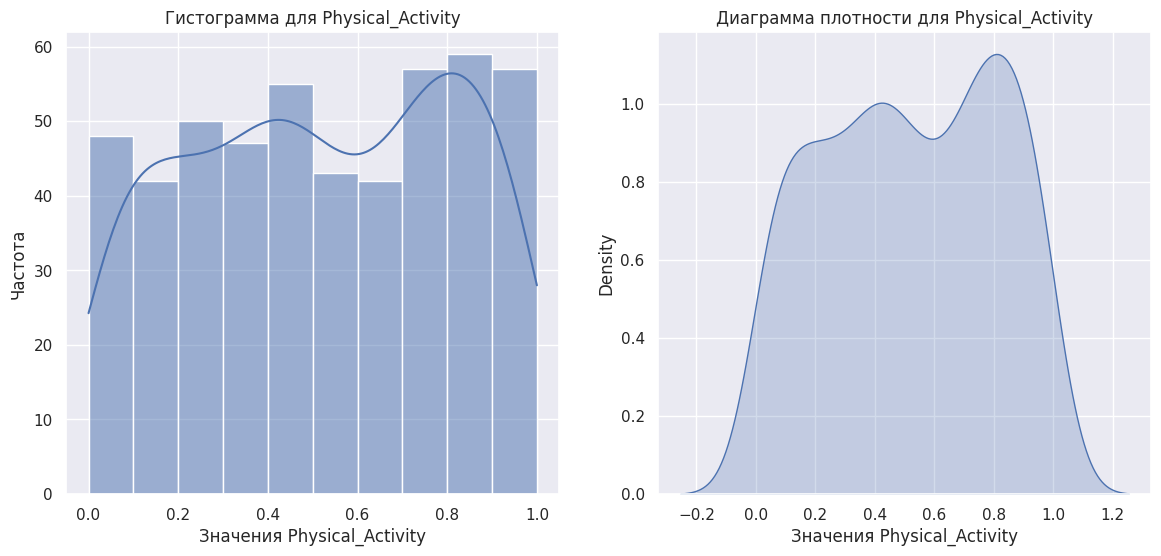

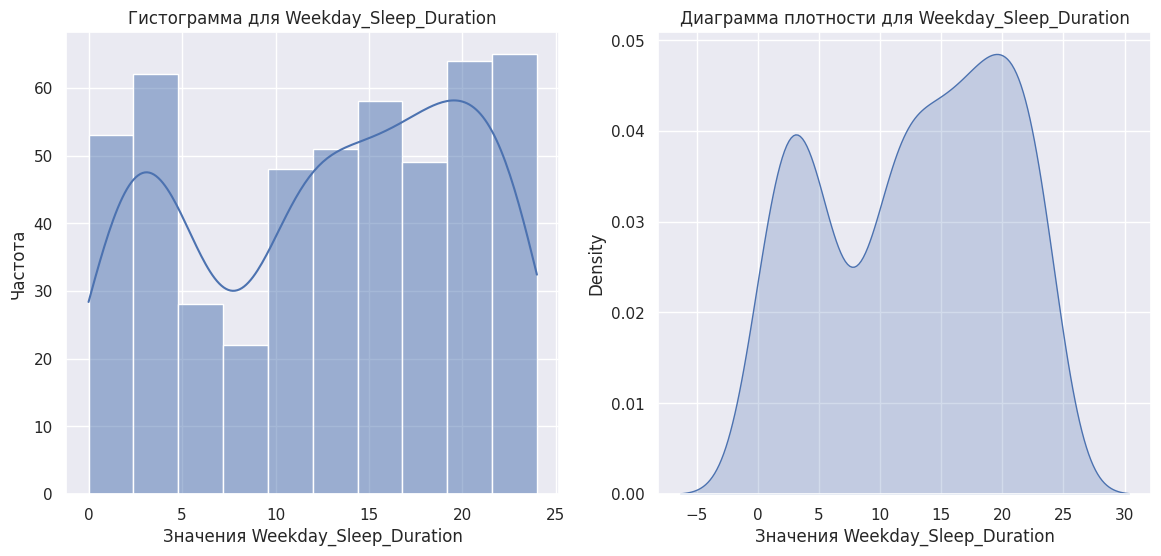

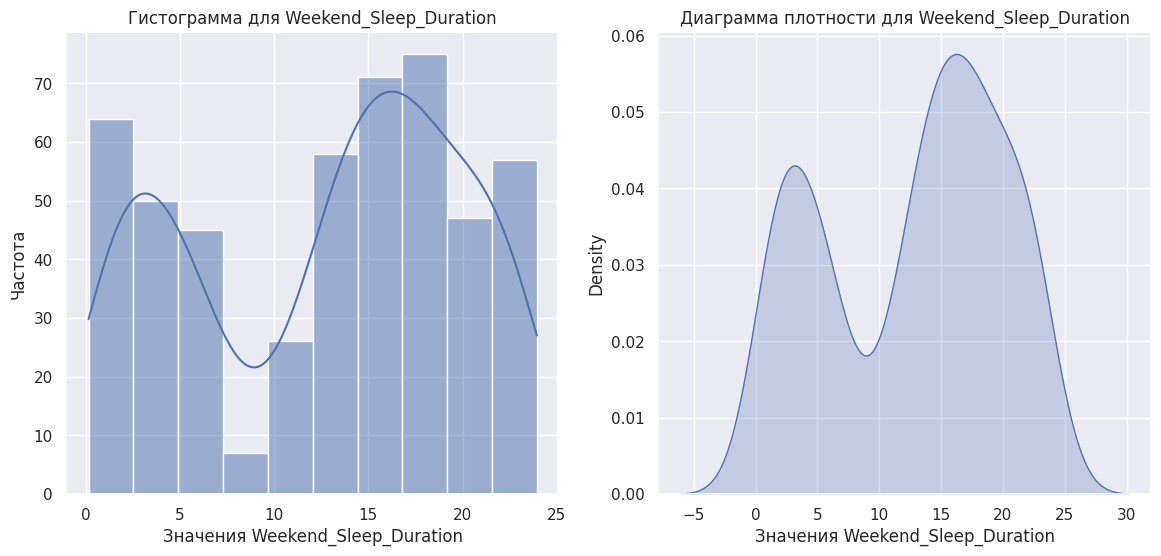

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


for feature in train.drop(columns=['Student_ID','Sleep_Quality_Category','Gender','University_Year','Caffeine_Intake','Sleep_Quality','Age']):
    plt.figure(figsize=(14, 6))


    plt.subplot(1, 2, 1)
    sns.histplot(train[feature],kde=True)
    plt.title(f'Гистограмма для {feature}')
    plt.xlabel(f'Значения {feature}')
    plt.ylabel('Частота')


    plt.subplot(1, 2, 2)
    sns.kdeplot(train[feature], fill=True)
    plt.title(f'Диаграмма плотности для {feature}')
    plt.xlabel(f'Значения {feature}')

    plt.show()


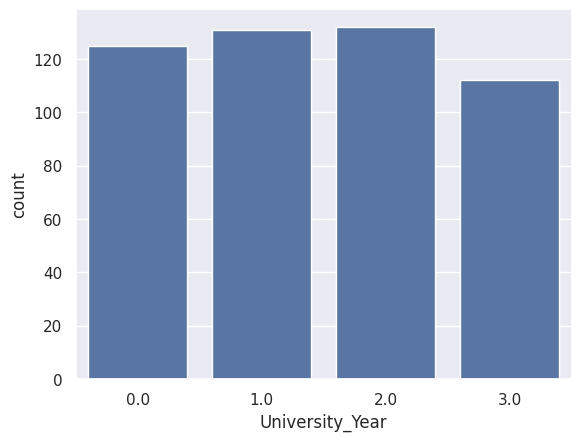

In [15]:
sns.countplot(x=train["University_Year"]);

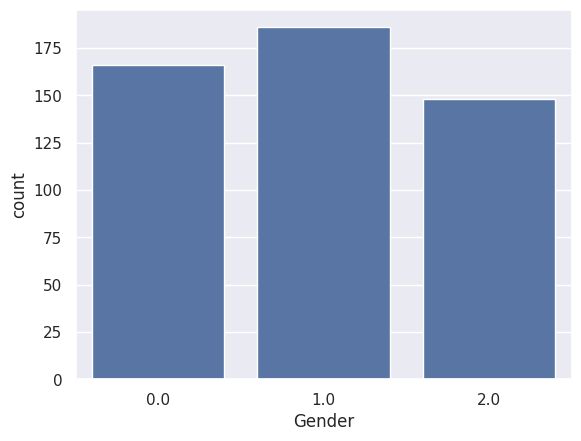

In [16]:
sns.countplot(x=train["Gender"]);

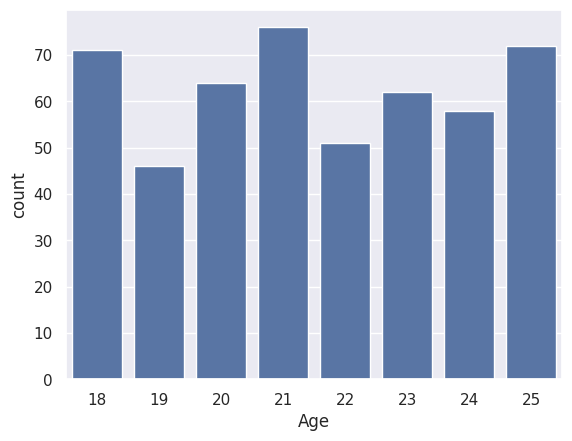

In [17]:
sns.countplot(x=train["Age"]);

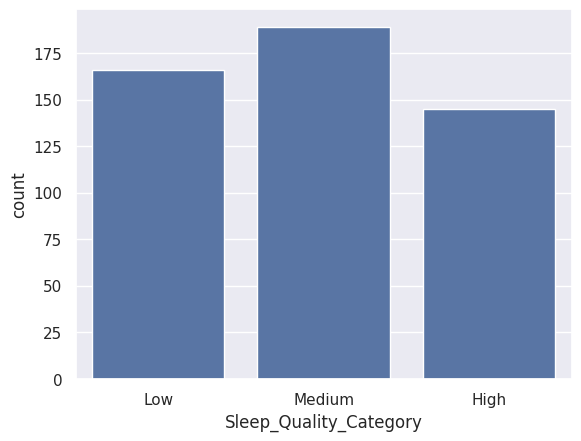

In [18]:
sns.countplot(x=train["Sleep_Quality_Category"]);

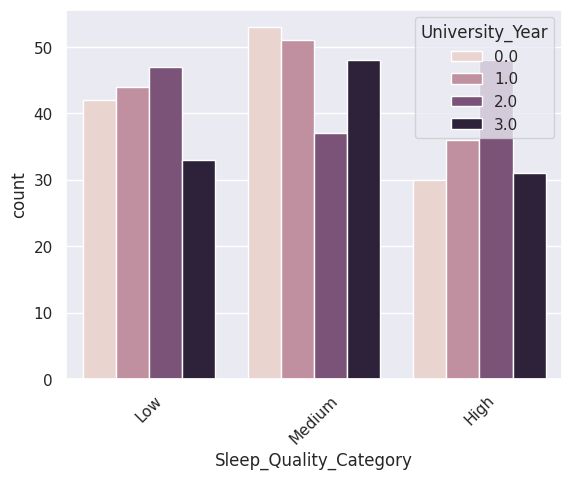

In [19]:
plt.xticks(rotation=45)
sns.countplot(data=train, hue='University_Year', x='Sleep_Quality_Category');

In [20]:
train.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Sleep_Quality_Category,Weekday_Sleep_Duration,Weekend_Sleep_Duration
0,1,24,2.0,1.0,7.7,7.9,3.4,2,0.308333,10,High,17.25,3.01
1,2,21,1.0,0.0,6.3,6.0,1.9,5,0.616667,2,Low,23.48,3.11
2,3,22,1.0,3.0,5.1,6.7,3.9,5,0.441667,5,Medium,10.88,14.45
3,4,24,2.0,3.0,6.3,8.6,2.8,4,0.458333,9,High,10.87,5.34
4,5,20,1.0,3.0,4.7,2.7,2.7,0,0.708333,3,Low,12.00,2.89


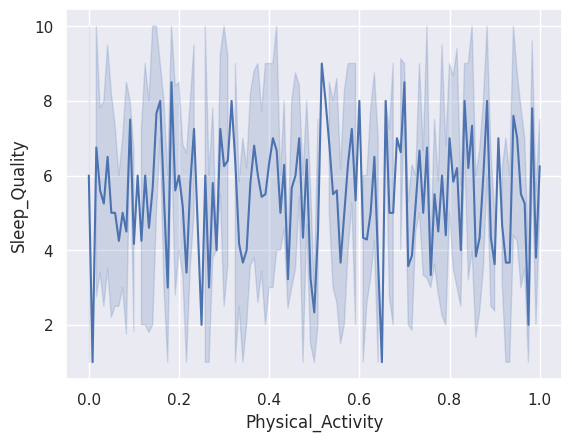

In [21]:

sns.lineplot(data=train, x='Physical_Activity', y='Sleep_Quality');

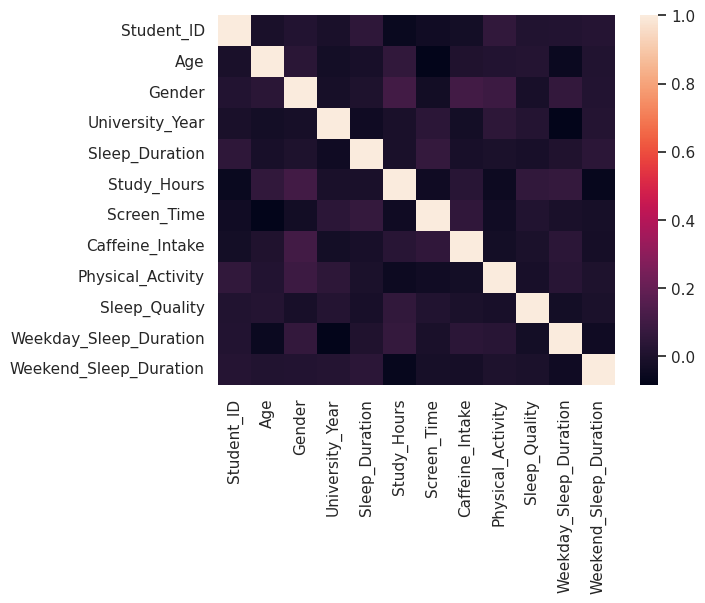

In [22]:
sns.heatmap(train.corr(numeric_only = True));

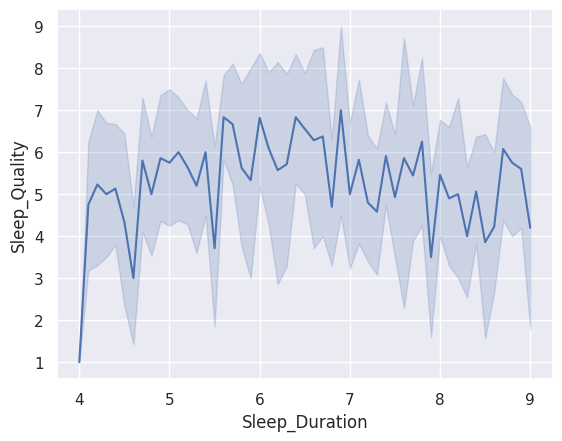

In [23]:
sns.lineplot(data=train, x='Sleep_Duration', y='Sleep_Quality');

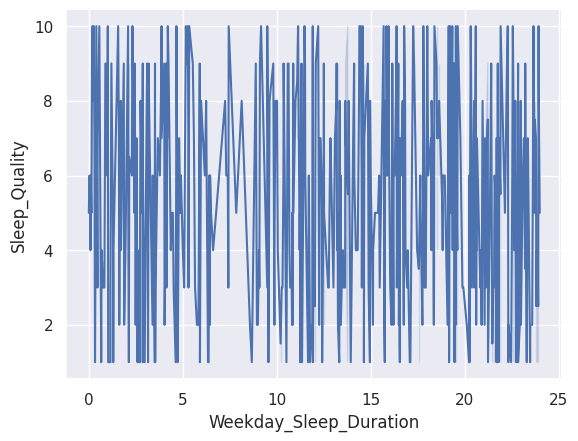

In [24]:
sns.lineplot(data=train, x='Weekday_Sleep_Duration', y='Sleep_Quality');

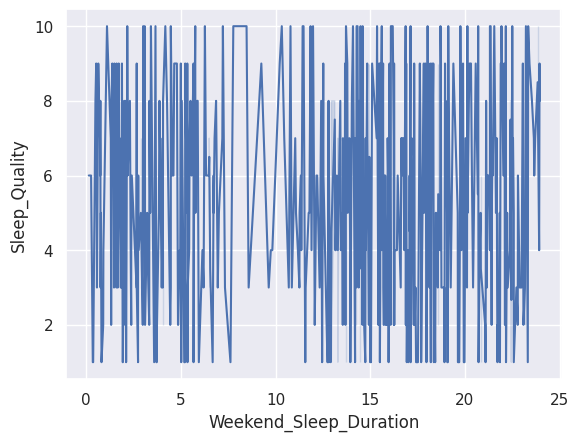

In [25]:
sns.lineplot(data=train, x='Weekend_Sleep_Duration', y='Sleep_Quality');

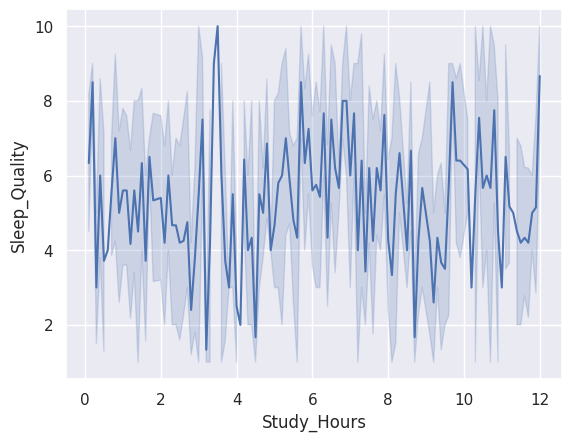

In [26]:
sns.lineplot(data=train, x='Study_Hours', y='Sleep_Quality');

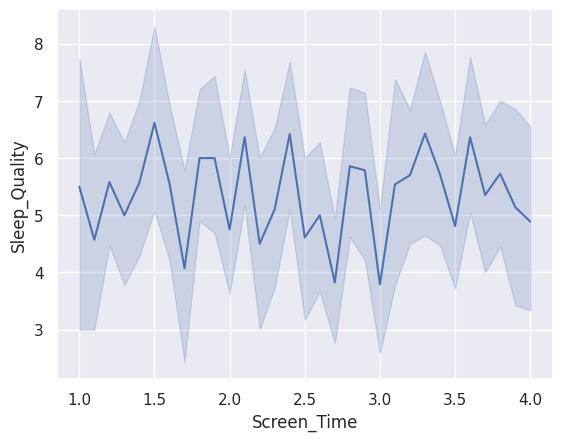

In [27]:
sns.lineplot(data=train, x='Screen_Time', y='Sleep_Quality');

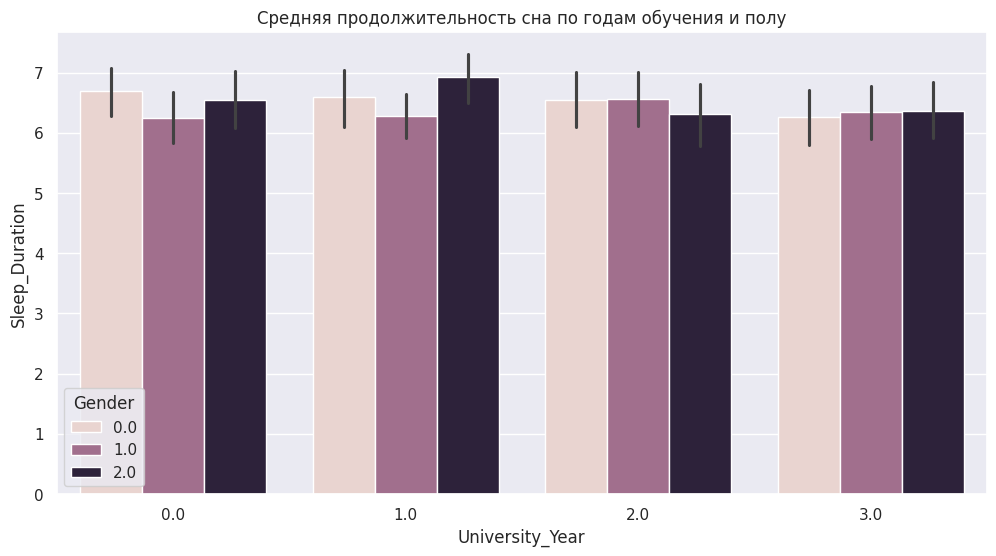

In [28]:
plt.figure(figsize=(12, 6))
sns.barplot(data=train, x='University_Year', y='Sleep_Duration', hue='Gender')
plt.title('Средняя продолжительность сна по годам обучения и полу')
plt.show()

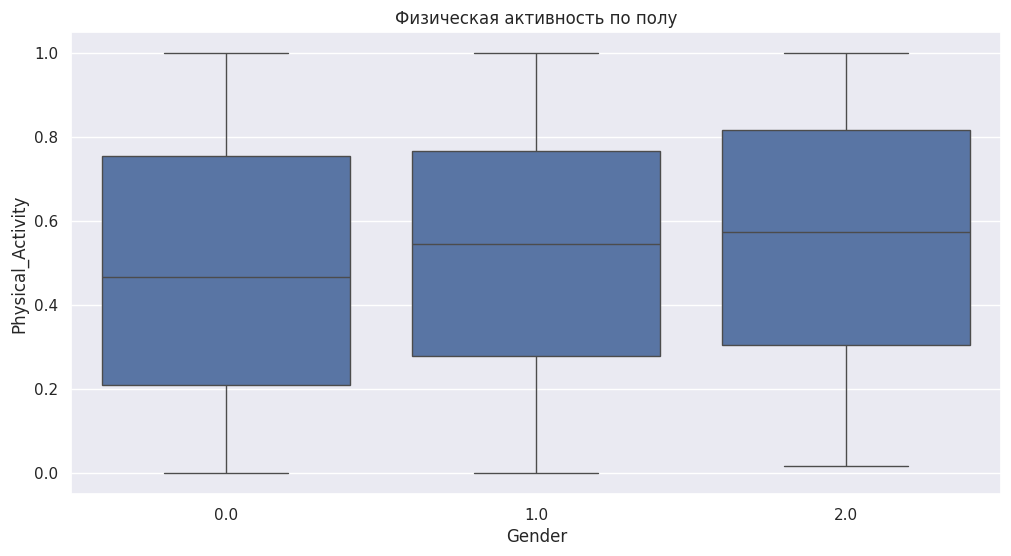

In [29]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='Gender', y='Physical_Activity')
plt.title('Физическая активность по полу')
plt.show()

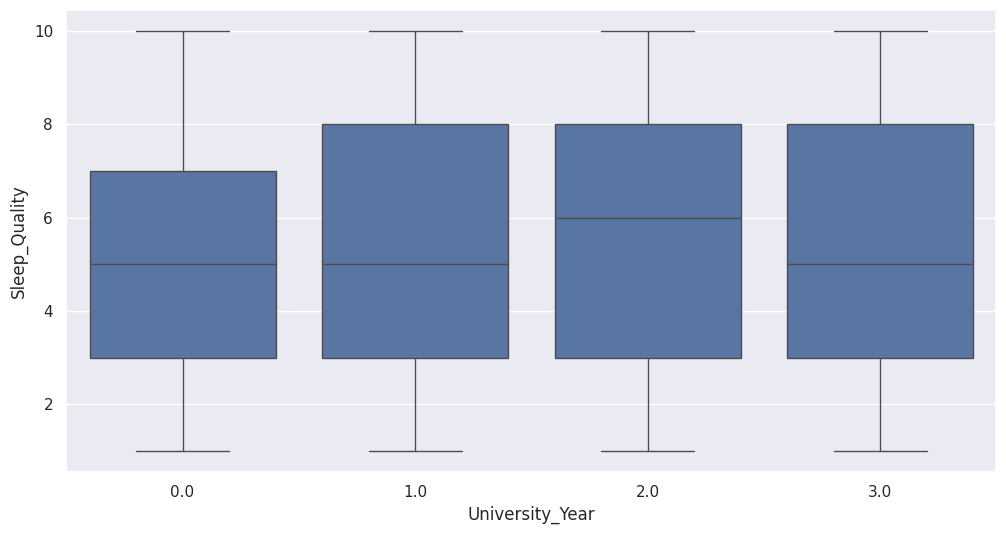

In [30]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=train, x='University_Year', y='Sleep_Quality')
plt.show()